# Simulación del Examen (Core)

## Contexto

La tarea es limpiar y explorar los datos para una compañía de tecnología emergente que desarrolla aplicaciones móviles. La empresa quiere mejorar la experiencia del usuario y aumentar la retención de usuarios en sus aplicaciones. Han recolectado datos sobre el uso de sus aplicaciones y quieren entender mejor cómo los usuarios interactúan con sus productos.

## Requisitos:

### 1. Limpieza de Datos:

El primer paso en este proceso es usar Python para limpiar los datos y dejarlos listos para el análisis. Deben:

* Identificar y abordar cualquier valor duplicado.
* Identificar y abordar cualquier dato que falte en este conjunto de datos. Trátenlos de forma adecuada. Incluyan una breve descripción en el método que usan para tratar con los valores que faltan junto con una justificación para el uso de ese método.
* Asegurarse de que todas las columnas coincidan con los tipos de datos enumerados en el diccionario de datos.
* Identificar y abordar cualquier inconsistencia en los valores categóricos (ejemplo: android, Android, ANDROID).
* Identificar y abordar cualquier punto de datos inapropiados o inusuales (ejemplo: tiempo de uso de 10000 horas en una semana).

### 2. Exploración de Datos:

El siguiente paso es completar una exploración de los datos usando Python. Esto debe incluir:

* Dos tipos diferentes de visualizaciones exploratorias univariantes. Cada visualización debe incluir una breve interpretación dentro del archivo de código.
* Dos tipos diferentes de visualizaciones exploratorias multivariantes. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

Diccionario de Datos:

* user_id: Identificación única del usuario.
* app_version: Versión de la aplicación usada.
* platform: Plataforma del dispositivo (Android, iOS).
* session_duration: Duración de la sesión en minutos.
* number_of_sessions: Número de sesiones en un día.
* country: País del usuario.
* user_feedback: Puntuación de la experiencia del usuario (1-5).

### Resolución

Primero que nada, generamos los datos usando el script especificado en la tarea:

In [55]:
import pandas as pd
import numpy as np
import random

# Configuramos la semilla para reproducibilidad
np.random.seed(42)

# Generamos los datos sintéticos
user_id = range(1, 301)
app_version = np.random.choice(['1.0', '1.1', '1.2', '1.3'], 300)
platform = np.random.choice(['Android', 'iOS'], 300)
session_duration = np.random.randint(1, 180, 300)
number_of_sessions = np.random.randint(1, 20, 300)
country = np.random.choice(['USA', 'Canada', 'Mexico', 'UK', 'Germany', 'France', 'Spain', 'Italy'], 300)
user_feedback = np.random.randint(1, 6, 300)

# Creamos el DataFrame
data = pd.DataFrame({
    'user_id': user_id,
    'app_version': app_version,
    'platform': platform,
    'session_duration': session_duration,
    'number_of_sessions': number_of_sessions,
    'country': country,
    'user_feedback': user_feedback
})

# Guardamos los datos en un archivo CSV
data.to_csv('../data/user_app_data.csv', index=False)
print("Datos generados y guardados en '../data/user_app_data.csv'")

# Eliminamos el data frame para evitar consumo de memoria innecesario.
del data

Datos generados y guardados en '../data/user_app_data.csv'


Luego, procedemos a cargar los datos del csv generado.

In [56]:
camino_dataset = "../data/user_app_data.csv"
df = pd.read_csv(camino_dataset)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             300 non-null    int64  
 1   app_version         300 non-null    float64
 2   platform            300 non-null    object 
 3   session_duration    300 non-null    int64  
 4   number_of_sessions  300 non-null    int64  
 5   country             300 non-null    object 
 6   user_feedback       300 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 16.5+ KB


Visualizamos las primeras columnas para dar una mirada rápida a los datos.

In [57]:
df.head(10)

,user_id,app_version,platform,session_duration,number_of_sessions,country,user_feedback
0,1,1.2,Android,109,11,France,1
1,2,1.3,Android,116,17,UK,2
2,3,1.0,Android,94,13,France,5
3,4,1.2,iOS,47,1,Canada,4
4,5,1.2,iOS,99,2,Canada,3
5,6,1.3,Android,55,9,Germany,4
6,7,1.0,iOS,168,3,Mexico,2
7,8,1.0,iOS,52,1,Canada,4
8,9,1.2,iOS,144,16,USA,1
9,10,1.1,iOS,13,6,France,2


## Limpieza de Datos

Ahora, se procede a detectar cualquier tipo de anormalidad en los datos.

Al ser un dataset generado con valores aleatorios, es poco probable que existan correlaciones, pero se asume que no se posee dicho conocimiento para el análisis.

Primero que nada, verificamos si existen datos nulos en el dataset.

In [58]:
from utils import obtener_estadisticas_datos_nulos

estadisticas = obtener_estadisticas_datos_nulos(df)

estadisticas

,datos sin NAs en q,Na en q,Na en %
user_id,300,0,0.0
app_version,300,0,0.0
platform,300,0,0.0
session_duration,300,0,0.0
number_of_sessions,300,0,0.0
country,300,0,0.0
user_feedback,300,0,0.0


De las estadísticas, se puede notar que no hay datos nulos en el dataset.

Lo primero que se puede notar en el DataSet es que no se especifica a que corresponde session_duration. Se asume que este valor es un promedio de duración por sesión, ya que no hay ningun otro dato en la descripción recibida.

In [59]:
# Para mayor claridad, se renombra el campo session_duration a avg_session_duration_minutes,
# indicando ya en la columna la duración de la sesión.
df.rename(columns={"session_duration": "session_duration_minutes"}, inplace=True)
df.head(10)

,user_id,app_version,platform,session_duration_minutes,number_of_sessions,country,user_feedback
0,1,1.2,Android,109,11,France,1
1,2,1.3,Android,116,17,UK,2
2,3,1.0,Android,94,13,France,5
3,4,1.2,iOS,47,1,Canada,4
4,5,1.2,iOS,99,2,Canada,3
5,6,1.3,Android,55,9,Germany,4
6,7,1.0,iOS,168,3,Mexico,2
7,8,1.0,iOS,52,1,Canada,4
8,9,1.2,iOS,144,16,USA,1
9,10,1.1,iOS,13,6,France,2


In [60]:
# Luego, se puede calcular el promedio de uso diario, multiplicando avg_session_duration_minutes
# por number_of_session.
df["daily_app_usage_minutes"] = df["session_duration_minutes"] * df["number_of_sessions"]
df.head(10)

,user_id,app_version,platform,session_duration_minutes,number_of_sessions,country,user_feedback,daily_app_usage_minutes
0,1,1.2,Android,109,11,France,1,1199
1,2,1.3,Android,116,17,UK,2,1972
2,3,1.0,Android,94,13,France,5,1222
3,4,1.2,iOS,47,1,Canada,4,47
4,5,1.2,iOS,99,2,Canada,3,198
5,6,1.3,Android,55,9,Germany,4,495
6,7,1.0,iOS,168,3,Mexico,2,504
7,8,1.0,iOS,52,1,Canada,4,52
8,9,1.2,iOS,144,16,USA,1,2304
9,10,1.1,iOS,13,6,France,2,78


Ahora, verificamos si existen duraciones inválidas en el dataset (uso de app mayor a 60 * 24 horas en un día)

In [61]:
df[df["daily_app_usage_minutes"] > 60 * 24]

,user_id,app_version,platform,session_duration_minutes,number_of_sessions,country,user_feedback,daily_app_usage_minutes
1,2,1.3,Android,116,17,UK,2,1972
8,9,1.2,iOS,144,16,USA,1,2304
10,11,1.2,iOS,114,17,France,3,1938
19,20,1.2,iOS,92,19,Spain,1,1748
25,26,1.1,iOS,127,19,UK,5,2413
...,...,...,...,...,...,...,...,...
269,270,1.2,Android,164,19,Canada,3,3116
278,279,1.0,iOS,145,14,UK,1,2030
281,282,1.3,Android,141,19,Canada,3,2679
288,289,1.0,iOS,153,19,Canada,2,2907


Al parecer, existen 79 filas que tienen un uso diario mayor a 60 * 24 minutos (o 1440 minutos) en un día, por lo cual, estos registros son incorrectos. Se procede a eliminar dichos registros.

In [62]:
indices_filas_duracion_incorrecta = df[df["daily_app_usage_minutes"] > 60 * 24].index

indices_filas_duracion_incorrecta

Index([  1,   8,  10,  19,  25,  26,  27,  30,  37,  43,  45,  47,  55,  57,
        59,  63,  65,  66,  78,  79,  80,  81,  82,  84,  85,  86,  97, 106,
       107, 109, 110, 111, 112, 114, 118, 120, 121, 123, 127, 135, 139, 143,
       146, 149, 153, 156, 158, 161, 163, 175, 177, 186, 188, 190, 194, 197,
       203, 206, 209, 214, 215, 219, 223, 225, 230, 231, 233, 237, 241, 245,
       251, 254, 258, 263, 269, 278, 281, 288, 292],
      dtype='int64')

In [63]:
df.drop(indices_filas_duracion_incorrecta, inplace=True)

In [64]:
# Hacemos de vuelta el filtro para verificar:
df[df["daily_app_usage_minutes"] > 60 * 24]

,user_id,app_version,platform,session_duration_minutes,number_of_sessions,country,user_feedback,daily_app_usage_minutes


Como se puede ver, ya no existen datos incorrectos.

Ahora, verificamos si los datos categóricos son correctos o no. Primero, se verifica la plataforma.

In [65]:
plataformas_unicas = df["platform"].unique()

plataformas_unicas

array(['Android', 'iOS'], dtype=object)

Solamente hay dos plataformas únicas, por lo que no hay errores en esta columna categórica. Ahora, se verifican las versiones.

In [66]:
versiones_unicas = df["app_version"].unique()

versiones_unicas

array([1.2, 1. , 1.3, 1.1])

Solamente hay tres versiones, por lo que no hay ningún error tampoco en esta columna.

Finalmente, verificamos las calificaciones de usuario, ya que estas deben ir del 1 al 5.

In [67]:
df[(df["user_feedback"] < 1) | (df["user_feedback"]) > 5]

,user_id,app_version,platform,session_duration_minutes,number_of_sessions,country,user_feedback,daily_app_usage_minutes


Se puede ver que tampoco existen calificaciones incorrectas en el dataset.

#### Estadísticas de dataset

In [68]:
df.describe()

,user_id,app_version,session_duration_minutes,number_of_sessions,user_feedback,daily_app_usage_minutes
count,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000
mean,153.316742,1.152941,80.950226,7.542986,2.882353,528.180995
std,88.907609,0.112221,50.780833,4.975778,1.490792,395.135723
min,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,74.000000,1.100000,36.000000,4.000000,2.000000,178.000000
50%,156.000000,1.200000,76.000000,6.000000,3.000000,476.000000
75%,230.000000,1.300000,122.000000,11.000000,4.000000,817.000000
max,300.000000,1.300000,178.000000,19.000000,5.000000,1431.000000


In [69]:
# Sacamos el coeficiente de variación por columna.

from utils import variation_coefficient

df[["session_duration_minutes", "number_of_sessions", "user_feedback", "daily_app_usage_minutes"]].agg(["mean", "std", variation_coefficient])

,session_duration_minutes,number_of_sessions,user_feedback,daily_app_usage_minutes
mean,80.950226,7.542986,2.882353,528.180995
std,50.780833,4.975778,1.490792,395.135723
variation_coefficient,0.627309,0.659656,0.517213,0.748107


Se puede ver que el coeficiente de variación es superior al 30%, por lo cual la media no se puede considerar un valor representativo para todas las columnas.

## Exploración de Datos

Visualizamos primero la distribución de la de la duración de la sesión

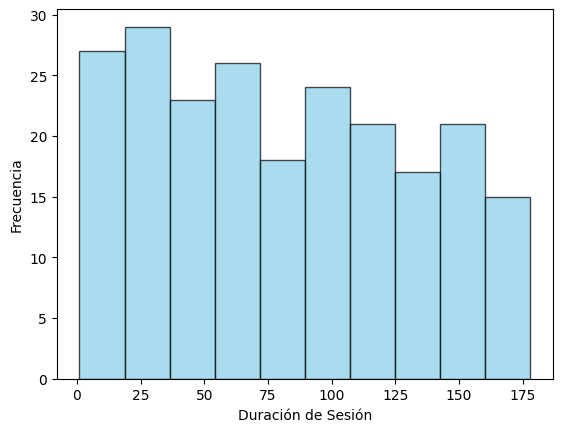

In [70]:
import matplotlib.pyplot as plt

plt.hist(
    df["session_duration_minutes"],
    color='skyblue',
    edgecolor='black',
    alpha=0.7,
)
plt.xlabel("Duración de Sesión")
plt.ylabel("Frecuencia")
plt.show()

Del histograma, se nota que los datos están un poco sesgados a la izquierda, por lo cual se puede inferir que hay una mayor cantidad de usuarios que usan poco el teléfono móvil.

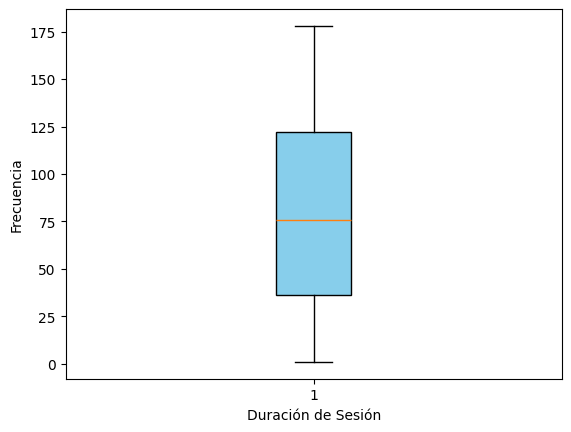

In [71]:
plt.boxplot(
    df["session_duration_minutes"],
    notch=False,
    patch_artist=True,
    boxprops={"facecolor": 'skyblue', "color": 'black'}
)
plt.xlabel("Duración de Sesión")
plt.ylabel("Frecuencia")
plt.show()

Del boxplot, se puede determinar que hay un poco de dispersión ya que hay un gran rango de datos (25 a 125 vs 0 a 175).

También, es posible analizar los datos por plataforma. Por ej:

array([<Axes: title={'center': 'Android'}>,
       <Axes: title={'center': 'iOS'}>], dtype=object)

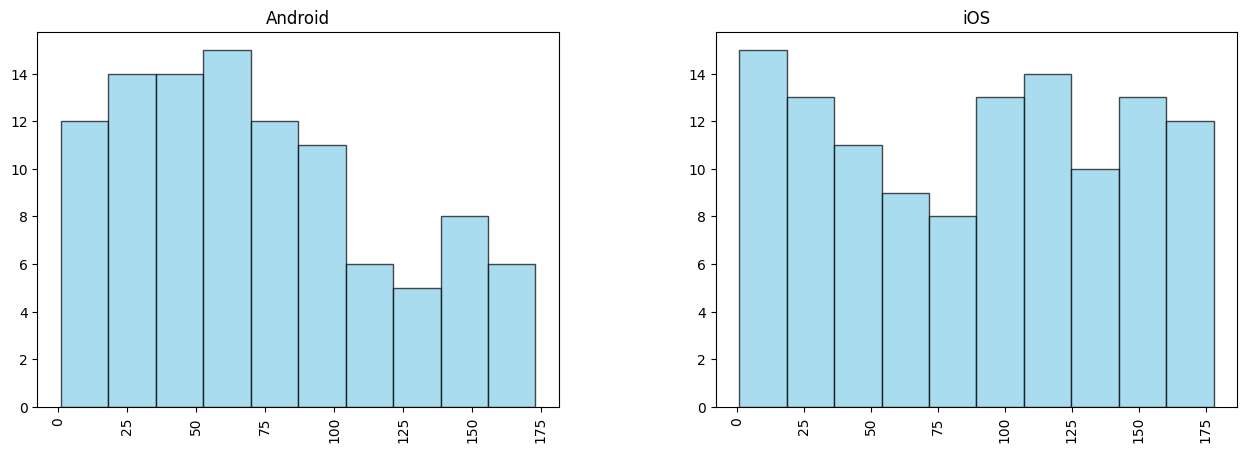

In [72]:
df.hist("session_duration_minutes",
    by="platform",
    color='skyblue',
    edgecolor='black',
    alpha=0.7,
    figsize=(15, 5),
)

<Axes: title={'center': 'session_duration_minutes'}, xlabel='platform'>

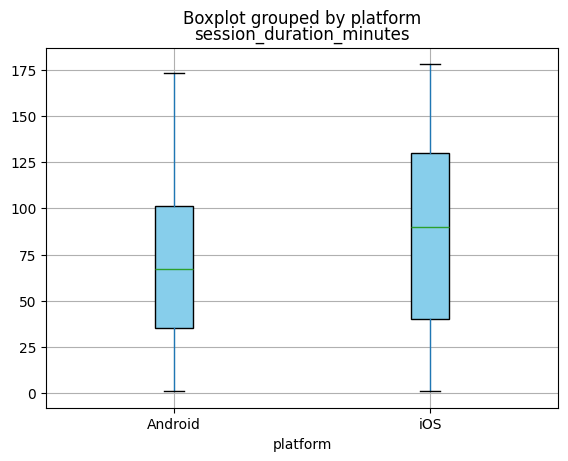

In [73]:
df.boxplot(
    "session_duration_minutes",
    by="platform",
    notch=False,
    patch_artist=True,
    boxprops={"facecolor": 'skyblue', "color": 'black'},
)

Analizando los gráficos por pataforma, podemos ver que hay mayor dispersión en el tiempo de sesión para usuarios iOS. También, se presentan más valores anómalos en las sesiones iOS.

Finalmente, se podrían ver estos mismos datos por versión.

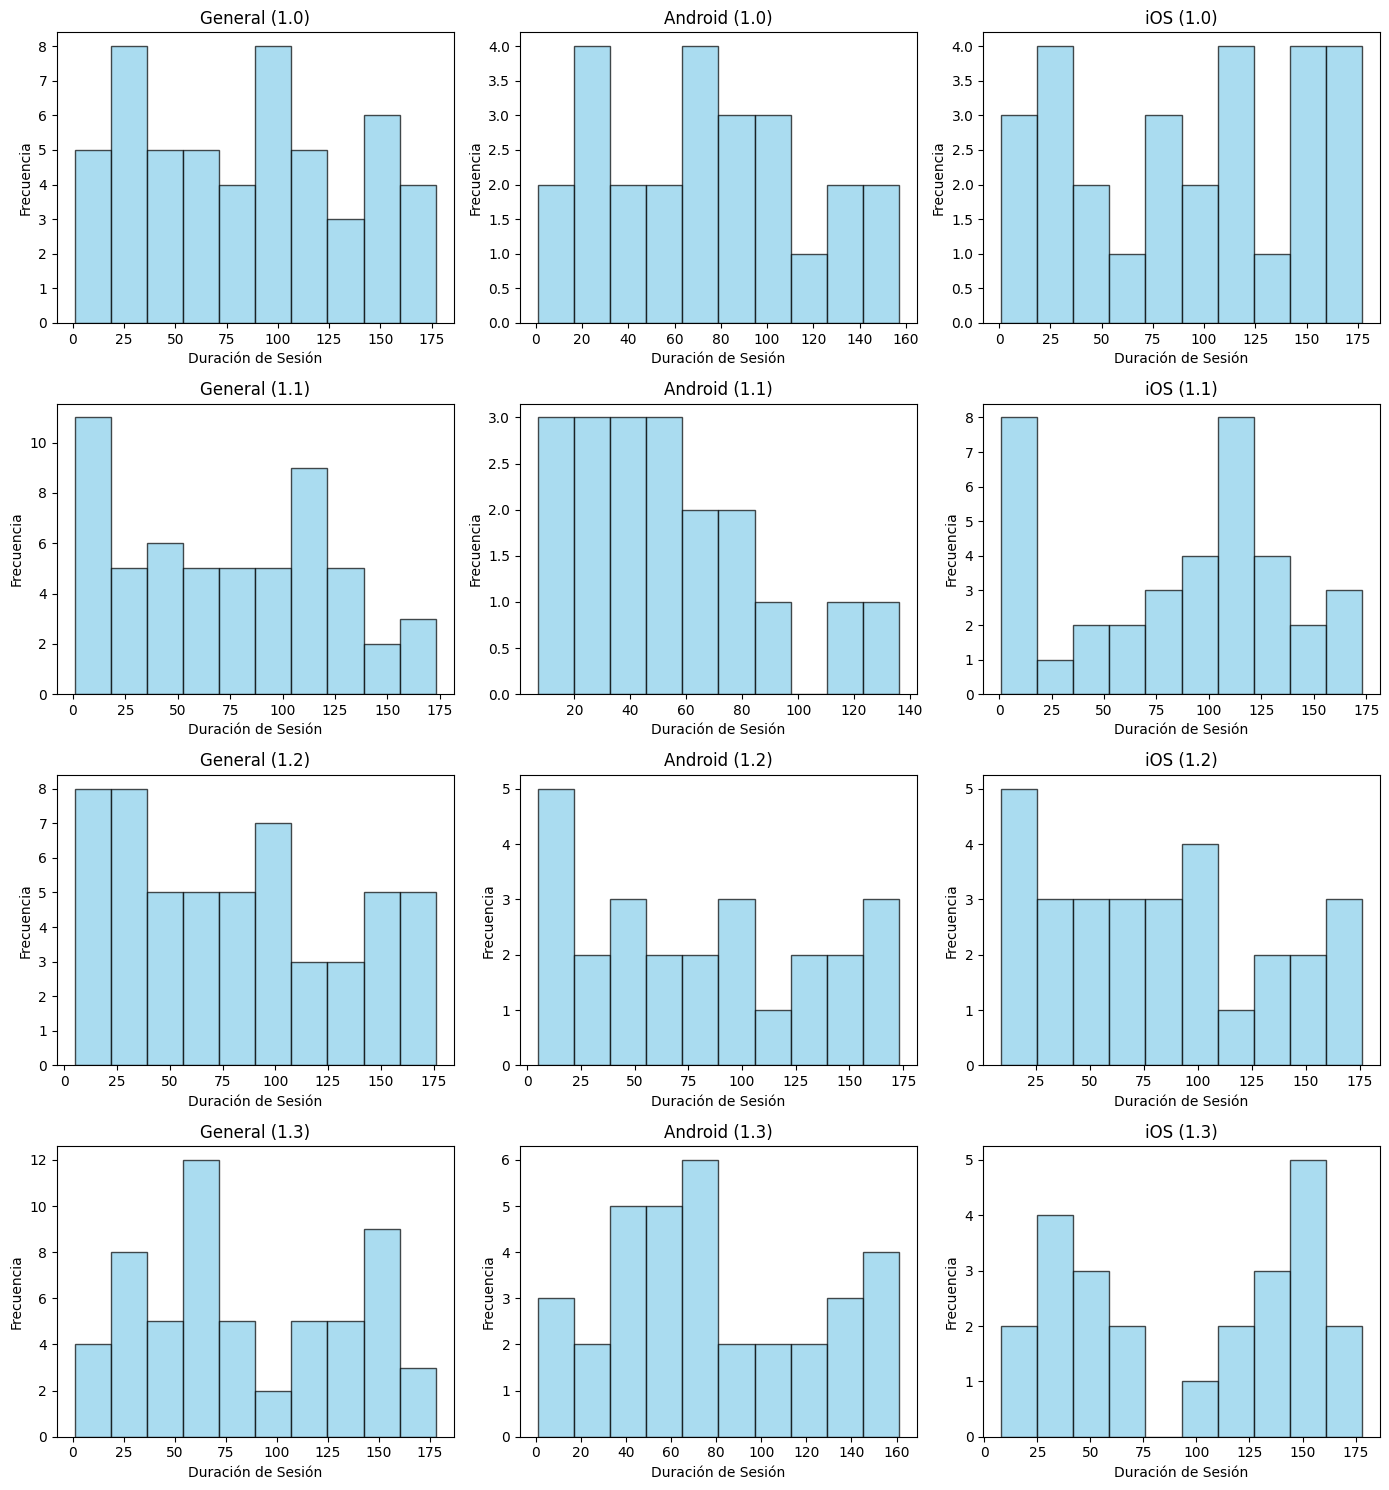

In [74]:
_, axes = plt.subplots(nrows=len(versiones_unicas), ncols=3, figsize=(14, 15))

versiones_unicas.sort()

for idx, version in enumerate(versiones_unicas):
    axes_idx = axes[idx]
    df_version_general = df[df["app_version"] == version]
    df_version_android = df[(df["app_version"] == version) & (df["platform"] == "Android")]
    df_version_ios = df[(df["app_version"] == version) & (df["platform"] == "iOS")]

    ax1 = axes_idx[0]
    ax2 = axes_idx[1]
    ax3 = axes_idx[2]

    ax1.hist(df_version_general["session_duration_minutes"],
        color='skyblue',
        edgecolor='black',
        alpha=0.7,
    )

    ax1.set_title(f"General ({version})")
    ax1.set_xlabel("Duración de Sesión")
    ax1.set_ylabel("Frecuencia")

    ax2.hist(df_version_android["session_duration_minutes"],
        color='skyblue',
        edgecolor='black',
        alpha=0.7,
    )

    ax2.set_title(f"Android ({version})")
    ax2.set_xlabel("Duración de Sesión")
    ax2.set_ylabel("Frecuencia")

    ax3.hist(df_version_ios["session_duration_minutes"],
        color='skyblue',
        edgecolor='black',
        alpha=0.7,
    )

    ax3.set_title(f"iOS ({version})")
    ax3.set_xlabel("Duración de Sesión")
    ax3.set_ylabel("Frecuencia")

    del df_version_general
    del df_version_android
    del df_version_ios
    

plt.tight_layout()

Sería bueno ver también la distribución sólo por versión para comparar.

<Axes: title={'center': 'session_duration_minutes'}, xlabel='app_version'>

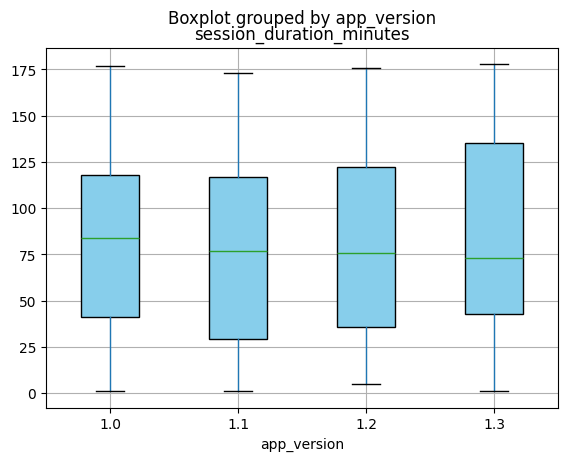

In [75]:
df.boxplot(
    column="session_duration_minutes",
    by="app_version",
    notch=False,
    patch_artist=True,
    boxprops={"facecolor": 'skyblue', "color": 'black'},
)

Y visualizando por versión:

<Axes: title={'center': 'session_duration_minutes'}, xlabel='[app_version, platform]'>

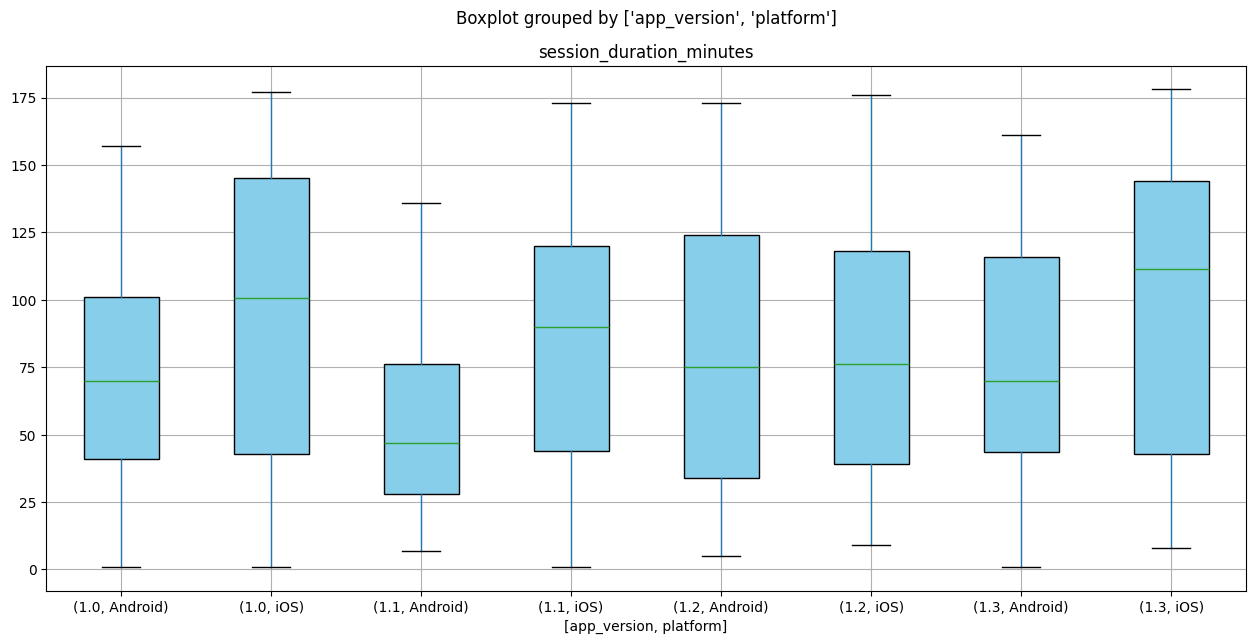

In [76]:
df.boxplot(
    column="session_duration_minutes",
    by=["app_version", "platform"],
    notch=False,
    patch_artist=True,
    boxprops={"facecolor": 'skyblue', "color": 'black'},
    figsize=(15, 7)
)

Al analizar las distribuciones, no se puede identificar un patrón muy claro, por lo que se procede a analizar gráficos multivariables o de dispersión.

### Análisis de nro de sesiones y la duración de cada sesión

Este análisis tiene como idea determinar si es que existe una relación entre la duración de cada sesión, y la cantidad de sesiones.

<Axes: xlabel='session_duration_minutes', ylabel='number_of_sessions'>

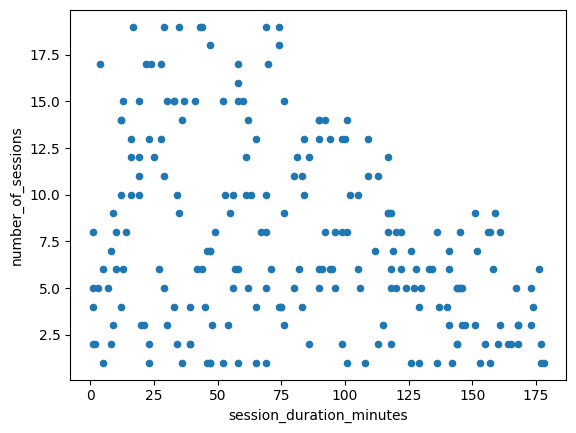

In [77]:
df.plot.scatter("session_duration_minutes", "number_of_sessions")

Como se puede ver en gráfico, no hay una relación muy clara entre ambas columnas ya que los datos son muy dispersos.

Verificamos también por plataforma para verificar si existe alguna diferencia.

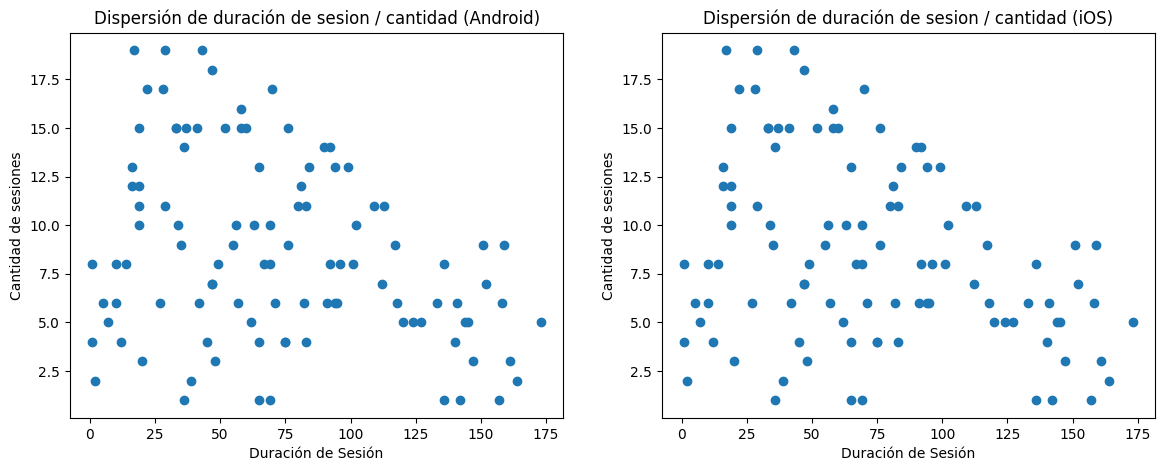

In [78]:
df_version_android = df[df["platform"] == "Android"]
df_version_ios = df[df["platform"] == "iOS"]

_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

ax1.scatter(
    df_version_android["session_duration_minutes"],
    df_version_android["number_of_sessions"],
)

ax1.set_title("Dispersión de duración de sesion / cantidad (Android)")
ax1.set_xlabel("Duración de Sesión")
ax1.set_ylabel("Cantidad de sesiones")

ax2.scatter(
    df_version_android["session_duration_minutes"],
    df_version_android["number_of_sessions"],
)

ax2.set_title("Dispersión de duración de sesion / cantidad (iOS)")
ax2.set_xlabel("Duración de Sesión")
ax2.set_ylabel("Cantidad de sesiones")


plt.show()

del df_version_android
del df_version_ios

Tampoco parece que exista una correlación por plataforma.

### Análisis de uso diario y calificaciones.

Este análisis tiene como proposito determinar si existe alguna correlación entre la cantidad de uso diario y las calificaciones que los usuarios asignan.

Se procede a elaborar un gráfico de barras para ver si estos datos están relacionados, ya que las calificaciones dadas por los usuarios son categóricas.

In [79]:
correlacion = df['daily_app_usage_minutes'].corr(df['user_feedback'])
print(f"Correlación entre duración de la sesión y rating: {correlacion}")

Correlación entre duración de la sesión y rating: 0.007413179359758495


Al ser cercano a 0 se puede determinar que no hay ninguna correlación lineal.

También, se puede ver a través de gráficos. En este caso, la calificación es una variable categórica (opciones del 1 al 5), por lo que se usa histogramas y boxplots para su análisis.

<Axes: title={'center': 'daily_app_usage_minutes'}, xlabel='user_feedback'>

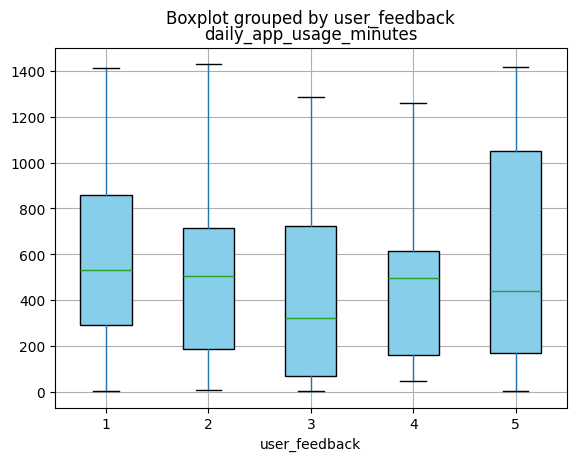

In [80]:
df.boxplot(
    "daily_app_usage_minutes",
    by="user_feedback",
    notch=False,
    patch_artist=True,
    boxprops={"facecolor": 'skyblue', "color": 'black'},
)

En estos gráficos, si nos fijamos en la calificación cinco, se puede notar que hay una gran dispersión, por lo que el uso diario parece no estar relacionado con la cantidad de uso diario de la aplicación para esta aplicación. En las demás calificaciones, son un poco más acotados los rangos de tiempo. pero de igual manera los rangos son grandes, y no necesariamente se puede visualizar que haya una tendencia de ubida o bajada de acuerdo a la cantidad de tiempo de uso de la aplicación.

Se procede a graficar los mapas de correlaciones.

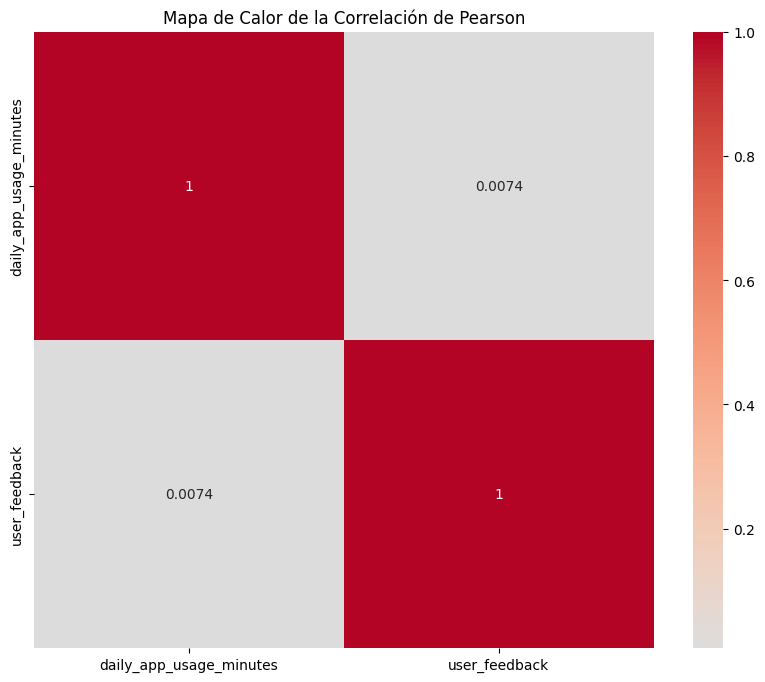

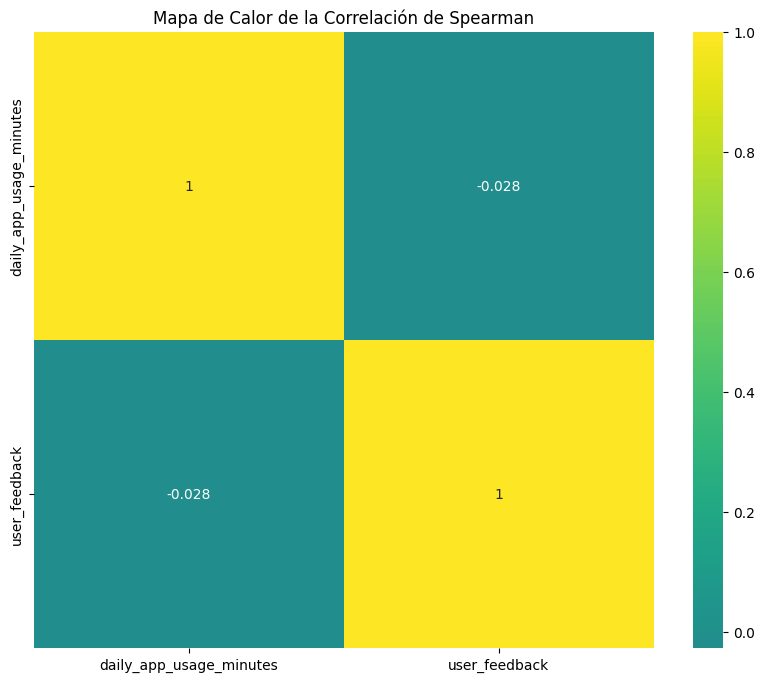

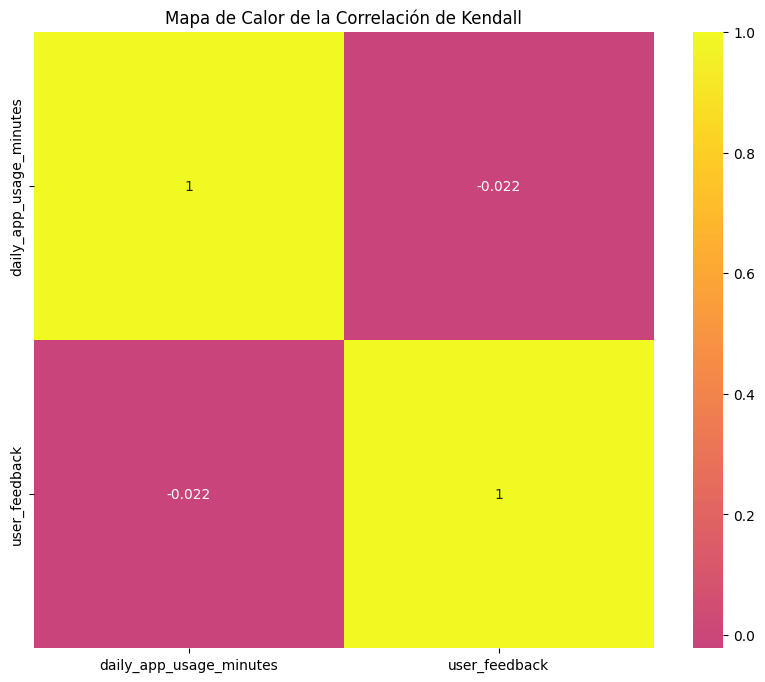

In [81]:
import seaborn as sns

# Calcular las correlaciones
correlation_matrix = df[["daily_app_usage_minutes", "user_feedback"]].corr(method='pearson')
spearman_corr = df[["daily_app_usage_minutes", "user_feedback"]].corr(method='spearman')
kendall_corr = df[["daily_app_usage_minutes", "user_feedback"]].corr(method='kendall')

# Crear mapas de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de Calor de la Correlación de Pearson")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='viridis', center=0)
plt.title("Mapa de Calor de la Correlación de Spearman")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(kendall_corr, annot=True, cmap='plasma', center=0)
plt.title("Mapa de Calor de la Correlación de Kendall")
plt.show()

Según los mapas de correlaciones, tampoco es posible ver al menos en este tipo de gráficos una correlación lineal.